In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import seaborn as sns

In [6]:
dataset = pd.read_csv("Depression Student Dataset.csv")
dataset.head(3)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes


In [64]:
dataset.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [47]:
for col in dataset.columns:
    print(col, dataset[col].unique())

Gender ['Male' 'Female']
Age [28 25 23 31 19 34 20 33 24 21 29 30 32 26 22 27 18]
Academic Pressure [2. 4. 1. 5. 3.]
Study Satisfaction [4. 5. 3. 2. 1.]
Sleep Duration ['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']
Dietary Habits ['Moderate' 'Healthy' 'Unhealthy']
Have you ever had suicidal thoughts ? ['Yes' 'No']
Study Hours [ 9  7 10  4  1  6  3 11  2 12  8  0  5]
Financial Stress [2 1 4 3 5]
Family History of Mental Illness ['Yes' 'No']
Depression ['No' 'Yes']


In [7]:
# Создаем словари для кодирования
sleep_duration_mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

dietary_habits_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}

# Применяем кодирование
dataset['Sleep Duration'] = dataset['Sleep Duration'].map(sleep_duration_mapping)
dataset['Dietary Habits'] = dataset['Dietary Habits'].map(dietary_habits_mapping)

# Преобразуем бинарные переменные с помощью LabelEncoder
label_encoder = LabelEncoder()

dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(dataset['Have you ever had suicidal thoughts ?'])
dataset['Family History of Mental Illness'] = label_encoder.fit_transform(dataset['Family History of Mental Illness'])
dataset['Depression'] = label_encoder.fit_transform(dataset['Depression'])

# Сохраняем энкодеры в .pkl файл
encoder_dict = {
    'sleep_duration_encoder': sleep_duration_mapping,
    'dietary_habits_encoder': dietary_habits_mapping,
    'gender_encoder': label_encoder,
    'suicidal_thoughts_encoder': label_encoder,
    'family_history_encoder': label_encoder,
    'depression_encoder': label_encoder
}

# Сохранение энкодера в pkl файл
file_path = './encoders.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(encoder_dict, file)

In [63]:
dataset

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,3,2,1,9,2,1,0
1,1,28,4.0,5.0,2,3,1,7,1,1,0
2,1,25,1.0,3.0,2,1,1,10,4,0,1
3,1,23,1.0,4.0,4,1,1,7,2,1,0
4,0,31,1.0,5.0,4,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,4,1,0,8,3,0,1
498,1,24,2.0,1.0,1,1,1,8,5,0,1
499,0,23,3.0,5.0,2,3,0,1,5,1,0
500,1,33,4.0,4.0,4,3,0,8,1,1,0


In [8]:
for col in dataset.columns:
    print(col, dataset[col].unique())

Gender [1 0]
Age [28 25 23 31 19 34 20 33 24 21 29 30 32 26 22 27 18]
Academic Pressure [2. 4. 1. 5. 3.]
Study Satisfaction [4. 5. 3. 2. 1.]
Sleep Duration [3 2 4 1]
Dietary Habits [2 3 1]
Have you ever had suicidal thoughts ? [1 0]
Study Hours [ 9  7 10  4  1  6  3 11  2 12  8  0  5]
Financial Stress [2 1 4 3 5]
Family History of Mental Illness [1 0]
Depression [0 1]


Text(0.5, 1.0, 'Correlation Matrix of Features')

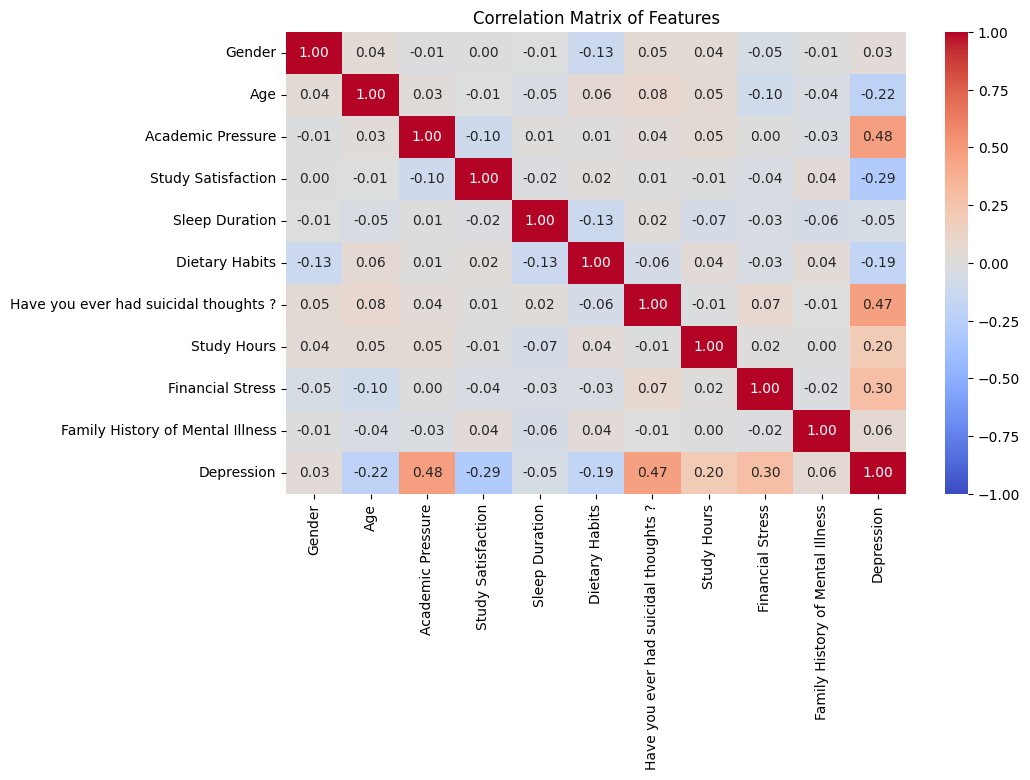

In [10]:
# Корреляционная матрица
correlation_matrix = dataset.corr()

# Построение тепловой карты
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax, vmin=-1, vmax=1)

# Настроим график
ax.set_title('Correlation Matrix of Features')


In [ ]:
X = dataset.drop(columns='Depression', axis=1)
y = dataset['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Модели

In [ ]:
# DecisionTree

dtclassifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtclassifier.fit(X_train, y_train)
y_pred = dtclassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8712871287128713

In [ ]:
# RandomForest

rfclassifier = RandomForestClassifier(n_estimators=40, criterion='entropy', max_features='sqrt', random_state=42)
rfclassifier.fit(X_train, y_train)
y_pred = rfclassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.900990099009901

In [ ]:
# XGBoost

xgbclassifier = XGBClassifier()
xgbclassifier.fit(X_train, y_train)
y_pred = xgbclassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9504950495049505

In [ ]:
# Сохранение лучшей модели в pkl файл

file_path = './model.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(xgbclassifier, file)